In [27]:

import sys
sys.path.append('../codes')

In [28]:
import torch
import numpy as np
import pandas as pd
from torch  import nn
from sklearn.preprocessing import OneHotEncoder

In [29]:
# %load_ext autoreload
# %autoreload 2
import networks
import utils
import config
import loss
import trainer
import pickle
import evaluator
from sklearn.preprocessing import MinMaxScaler

In [30]:
tr_loader = utils.create_dataloader_soil(config.training_representation, config.training_data, config.soil_data)

In [31]:
validation_loader = utils.create_dataloader_soil(config.val_representation, config.validation_data, config.soil_data,
                                                        is_training=False)

In [32]:
# utils.dump_pickle(tr_loader.dataset.weather_scaler, config.weather_scaler_path)
# utils.dump_pickle(tr_loader.dataset.target_scaler, config.target_scaler_path)

In [33]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:1


In [34]:
num_geno = tr_loader.dataset.data.shape[1]
model = networks.final_net(num_features = tr_loader.dataset.data.shape[1], hidden_dim=350)

In [35]:
criterion = nn.MSELoss()

In [36]:
output = trainer.train_model_by_avg(model, tr_loader, validation_loader, criterion, config.soil_model_path)

Current epoch: 400 Best epoch 356
Training Loss: 1.4200573268067807, training PCC: 0.8201084243018852
Validation Loss: 2.110083126805607, validation PCC: 0.7534003926879635

Current epoch: 401 Best epoch 356
Training Loss: 1.417770872754819, training PCC: 0.8204309394317411
Validation Loss: 2.1089092547102912, validation PCC: 0.7545192460098327

Current epoch: 402 Best epoch 356
Training Loss: 1.4188634156418578, training PCC: 0.8202776303365432
Validation Loss: 2.1179578870998146, validation PCC: 0.7546982757887287

Current epoch: 403 Best epoch 356
Training Loss: 1.4171390842598723, training PCC: 0.8205193777117468
Validation Loss: 2.1102393629328575, validation PCC: 0.7552333487015965

Current epoch: 404 Best epoch 356
Training Loss: 1.4166686991672686, training PCC: 0.8205860406782773
Validation Loss: 2.1078792075419055, validation PCC: 0.7553203877752979

Current epoch: 405 Best epoch 356
Training Loss: 1.4178816818520237, training PCC: 0.8204165441231602
Validation Loss: 2.109681

In [37]:
tr_loss, val_loss, tr_pccs, val_pccs = output

df = pd.DataFrame({
    'epochs': list(range(len(tr_loss))) * 2,
    'loss': list(tr_loss) + list(val_loss),
    'type': ['training'] * len(tr_loss) + ['validation'] * len(val_loss),
    'pcc': np.array(tr_pccs + val_pccs)
})

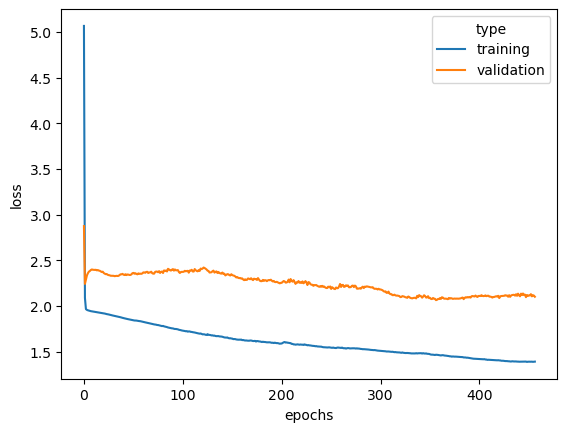

In [38]:
import seaborn as sns
ax = sns.lineplot(data=df, x="epochs", y="loss", hue="type")

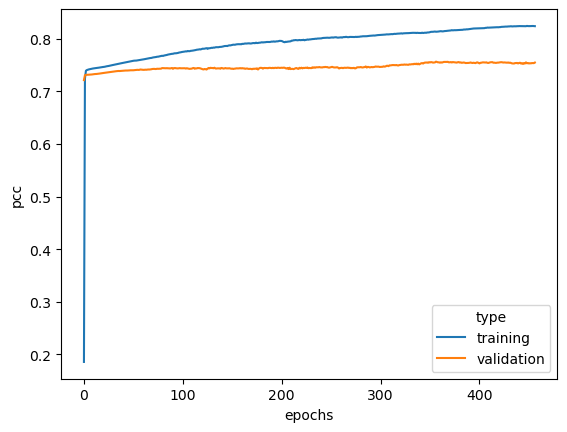

In [39]:
ax = sns.lineplot(data=df, x="epochs", y="pcc", hue="type")